1.
Понижение размерности и визуализация данных
Примените методы снижения размерности sklearn.decomposition.PCA и
sklearn.manifold.TSNE для визуализации данных с которым вы работали в лабораторной
No 2 (снижая размерность до двух). Отобразите полученные результаты
2. Кластерный анализ
1) С помощью алгоритма k-means сделайте квантование изображения (удаление
визуально избыточной информации) с глубиной 64, 32, 16 и 8 уровней. Изображение
выбираете произвольно.
Пример: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html
2) Сгенерируйте набор синтетических данных (точек на плоскости), например при помощи
sklearn.datasets.make_blobs, число центров N (от 3 до 5) выберите произвольно.
Постройте силуэтные графики для Kmeans (для числа кластеров N-1, N, N+1), объясните
результаты
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
3) Сгенерируйте набор синтетических данных в виде смеси двух гауссиан, для этого воспользуйтесь функцией: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.multivariate_normal.html
(примените ее дважды с разными mean и cov), результат объедините в одно множество.
Разделите смесь с помощью EM алгоритма(sklearn.mixture.GaussianMixture), обратите
внимание на параметр covariance_type. С помощью атрибутов weights_ и covariances_
восстановите их значения (сравните с оригинальными). Визуализируйте результат.
3. Обработка текстовых данных
Загрузите набор текстовых данных, снабженных метками классов. Проведите
предобработку данных (удалите стоп-слова, пунктуацию, проведите нормализацию),
постройте визуализацию наиболее частых слов или n-gram в каждом классе (wordcloud),
извлеките признаки (например sklearn.feature_extraction.text .TfidfVectorizer; или
sklearn.decomposition.TruncatedSVD )
Проведите классификацию текстовых данных, сделайте оценку качества
Текстовые данные для анализа можно брать здесь:
https://lionbridge.ai/datasets/the-best-25-datasets-for-natural-language-processing/
или из любого другого источника по вашему выбору
(в случае данных с множеством классов достаточно взять 2-3 класса )

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [55]:
PATH = r"Lc/LAb2/datasets/"

In [83]:
data = pd.read_csv(PATH + "mushrooms.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

def featureTransform(data):
    return [data[i].astype("category").cat.codes for i in data.columns]

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [92]:
df = pd.DataFrame(featureTransform(data) ).T.drop(0,axis = 1)
df['y'] = data['class'].astype('category').cat.codes

In [119]:
pca = PCA(n_components = 2)
pcaData = pd.DataFrame(pca.fit_transform(df[range(1,23)]))
print(sum(pca.explained_variance_ratio_))
pcaData.columns = ['pca_one','pca_two']

df['pca_one'] = pcaData['pca_one']
df['pca_two'] = pcaData['pca_two']


0.5033983166505276


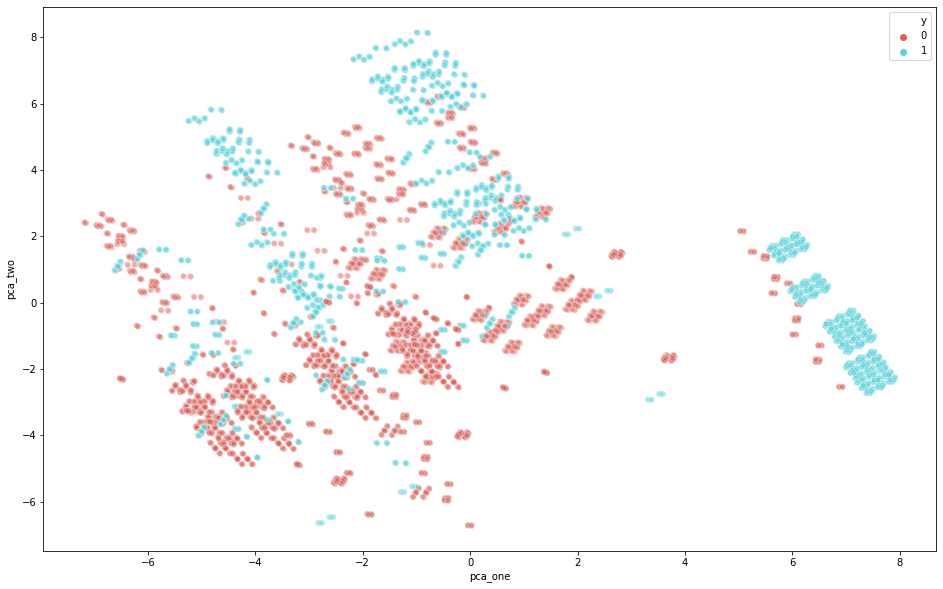

In [106]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = "pca_one", y="pca_two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

In [122]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter=1000)
tsne_results = pd.DataFrame(tsne.fit_transform(df[['pca_one','pca_two']]),columns = ['tsne_one','tsne_two'])

df['tsne_one'] = tsne_results['tsne_one']
df['tsne_two'] = tsne_results['tsne_two']

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.006s...
[t-SNE] Computed neighbors for 8124 samples in 0.201s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 0.124354
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.359261
[t-SNE] KL divergence after 1000 iterations: 0.333546


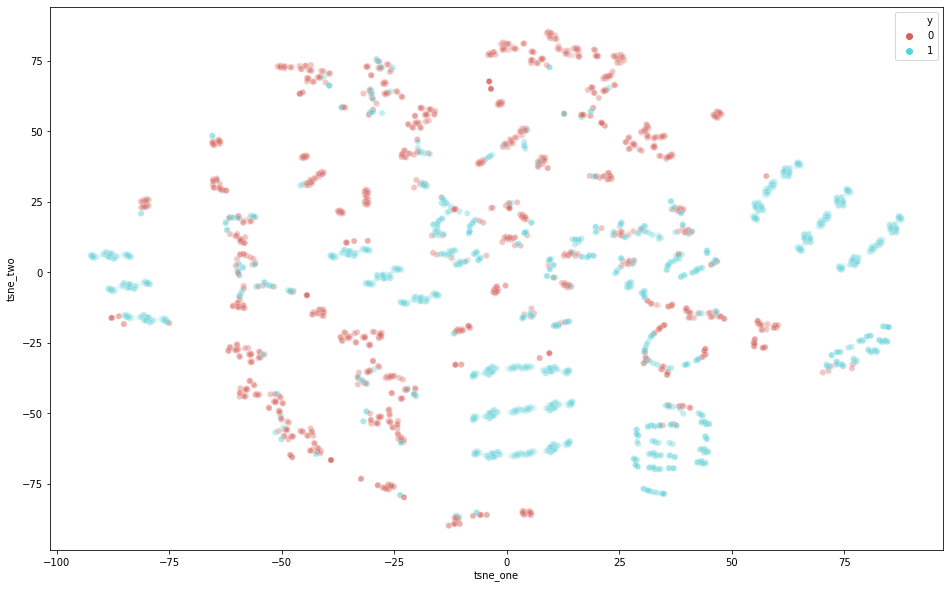

In [123]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = 'tsne_one',y = "tsne_two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.1
)

## Cluster analysis

In [3]:
from PIL import Image

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [152]:
image = np.array(Image.open('2077.jpg'))

In [153]:
def recreate_image(codebook, labels, w, h):
        """Recreate the (compressed) image from the code book & labels"""
        d = codebook.shape[1]
        image = np.zeros((w, h, d))
        label_idx = 0
        for i in range(w):
            for j in range(h):
                image[i][j] = codebook[labels[label_idx]]
                label_idx += 1
        return image

def K_means(image, n_colors):
    image = np.array(image, dtype=np.float64) / 255
    
    # Load Image and transform to a 2D numpy array.
    w, h, d = original_shape = tuple(image.shape)
    image_array = np.reshape(image, (w * h, d))
    
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    print("done in %0.3fs." % (time() - t0))

    # Get labels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print("done in %0.3fs." % (time() - t0))
    return kmeans,labels
    


In [154]:
n_colors = [64,32,16,8]
recr_list = [K_means(image,i) for i in n_colors]

done in 1.533s.
Predicting color indices on the full image (k-means)
done in 0.911s.
done in 1.484s.
Predicting color indices on the full image (k-means)
done in 0.690s.
done in 1.280s.
Predicting color indices on the full image (k-means)
done in 0.400s.
done in 1.254s.
Predicting color indices on the full image (k-means)
done in 0.339s.


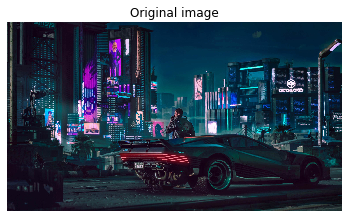

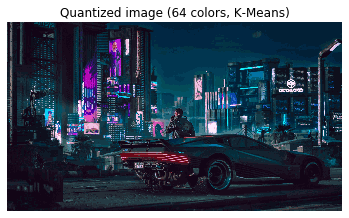

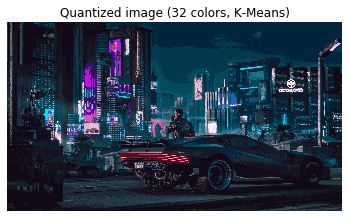

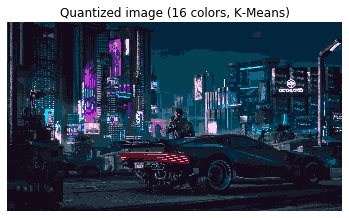

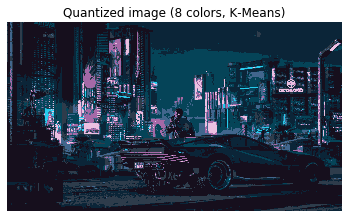

In [156]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(image)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
 
plt.imshow(recreate_image(recr_list[0][0].cluster_centers_, recr_list[0][1], image.shape[0], image.shape[1]))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (32 colors, K-Means)')
 
plt.imshow(recreate_image(recr_list[1][0].cluster_centers_, recr_list[1][1], image.shape[0], image.shape[1]))

plt.figure(4)
plt.clf()
plt.axis('off')
plt.title('Quantized image (16 colors, K-Means)')
 
plt.imshow(recreate_image(recr_list[2][0].cluster_centers_, recr_list[2][1], image.shape[0], image.shape[1]))

plt.figure(5)
plt.clf()
plt.axis('off')
plt.title('Quantized image (8 colors, K-Means)')
 
plt.imshow(recreate_image(recr_list[3][0].cluster_centers_, recr_list[3][1], image.shape[0], image.shape[1]))



## silhouette analysis

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

In [168]:
X,y = make_blobs(n_samples=1000,centers=4,n_features=5)

For n_clusters = 3 The average silhouette_score is : 0.6492268009875306
For n_clusters = 4 The average silhouette_score is : 0.7275823562304115
For n_clusters = 5 The average silhouette_score is : 0.5946553639408869


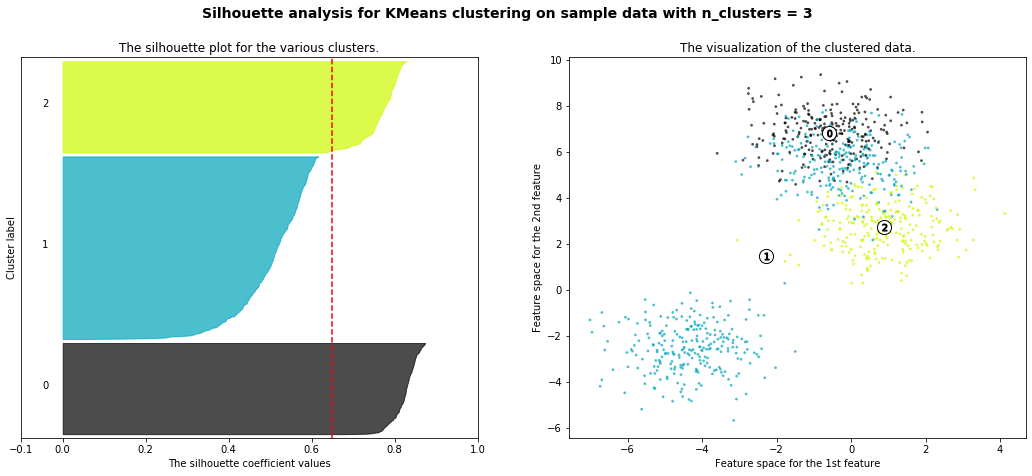

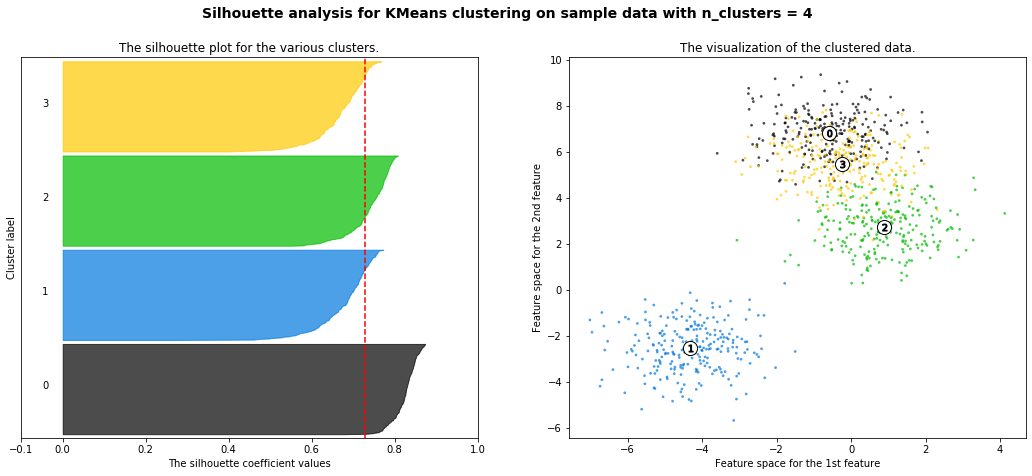

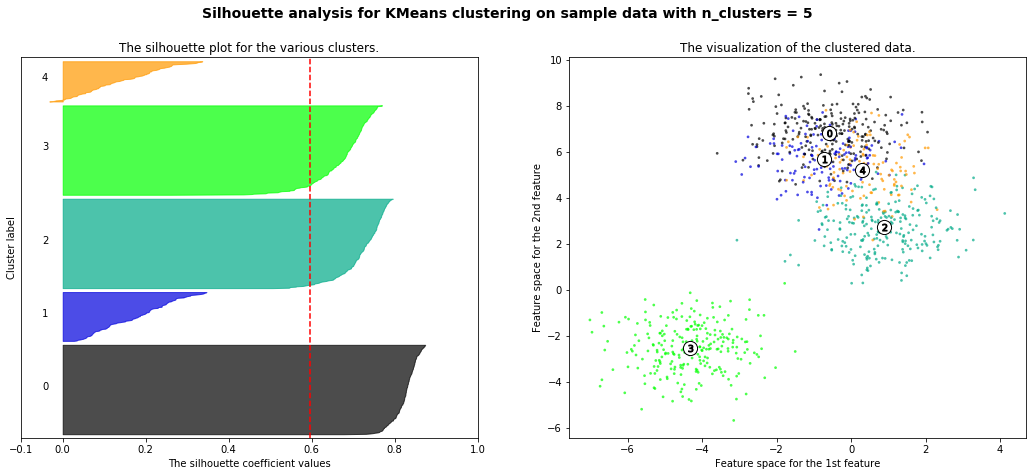

In [169]:
range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# EM-algorithm

In [5]:
from sklearn.mixture import GaussianMixture

In [302]:
mean,covariance = [16,8],[[10,2],[105,-20]]
mean2,covariance2 = [16,-14],[[32,0],[0,20]]

X = np.random.multivariate_normal(size = 1000,mean = mean, cov = covariance)
X2 = np.random.multivariate_normal(size = 1000,mean = mean2, cov = covariance2)


data = np.concatenate((X,X2),axis = 0)
target = np.concatenate((np.zeros(1000),np.ones(1000)))
#target = np.random.permutation(target)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  after removing the cwd from sys.path.


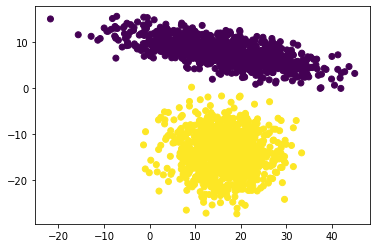

In [303]:
plt.scatter(data[:,0], data[:,1], c=target)

In [312]:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(data)
labels = gmm.predict(data)

print("Predicted means\n" ,gmm.means_)
print("Real means\n",mean,'\n',mean2)

print("Predicted covariance\n" ,gmm.covariances_)
print("Real covariance\n",covariance,'\n',covariance2)

Predicted means
 [[ 16.46137303 -14.02862082]
 [ 16.26598075   7.98905967]]
Real means
 [16, 8] 
 [16, -14]
Predicted covariance
 [[[ 31.6519294   -1.00302317]
  [ -1.00302317  19.59866221]]

 [[106.2427015  -18.08452113]
  [-18.08452113   7.04686101]]]
Real covariance
 [[10, 2], [105, -20]] 
 [[32, 0], [0, 20]]


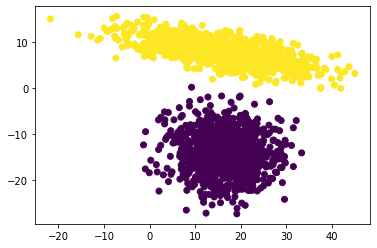

In [315]:
plt.scatter(data[:,0], data[:,1], c=labels)

# Text analysis

In [26]:
import nltk
import wordcloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import re

In [27]:
text = pd.read_json('JEOPARDY_QUESTIONS1.json')

In [77]:
text.head()

,category,air_date,question,value,answer,round,show_number
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",$200,Copernicus,Jeopardy!,4680
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,$200,Jim Thorpe,Jeopardy!,4680
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,$200,Arizona,Jeopardy!,4680
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",$200,McDonald\'s,Jeopardy!,4680
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",$200,John Adams,Jeopardy!,4680


In [15]:
text['category'].value_counts()

BEFORE & AFTER                547
SCIENCE                       519
LITERATURE                    496
AMERICAN HISTORY              418
POTPOURRI                     401
                             ... 
ODD TITLES                      1
CYBER-GLOSSARY                  1
NEW LAWS                        1
COLORFUL TITLES                 1
THE CLINTON ADMINISTRATION      1
Name: category, Length: 27995, dtype: int64

In [16]:
df = text[['category','question']]

In [38]:
def clear(question):
    arr = question.split(' ')
    retarr = list()
    for i in arr:
        if i  not in stopwords.words("english"):
            arr =  re.sub(r'[^\w]', ' ', i)
            arr = arr.lower()
            retarr.append(arr)
    return ' '.join(retarr)
            
    



C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


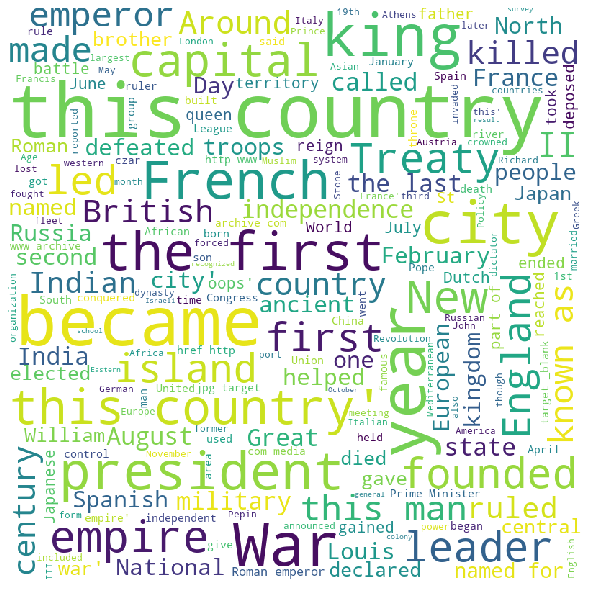

In [49]:
historyCat =  df.loc[df['category'] == 'HISTORY']
historyCat['question'] = historyCat['question'].map(delete_stopwords)

historyWords = ' '.join(list(historyCat["question"].values))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words("english"), 
                min_font_size = 10).generate(historyWords)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()



C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


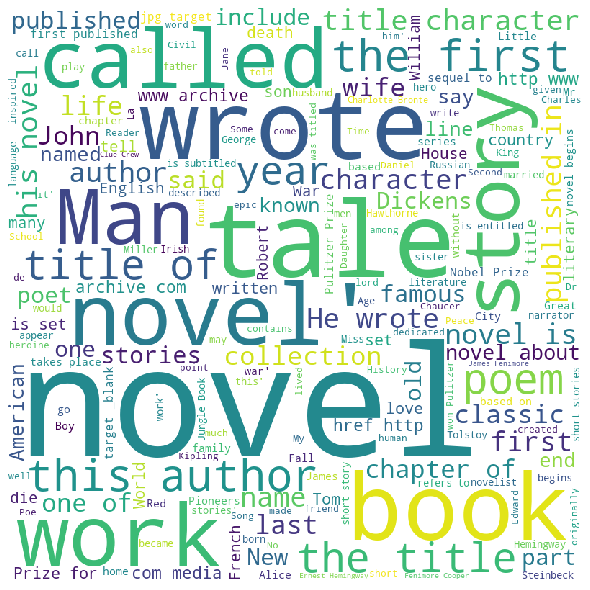

In [48]:
LITERATURECat =  df.loc[df['category'] == 'LITERATURE']
LITERATURECat['question'] = LITERATURECat['question'].map(delete_stopwords)

LITERATUREWords = ' '.join(list(LITERATURECat["question"].values))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words("english"), 
                min_font_size = 10).generate(LITERATUREWords)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


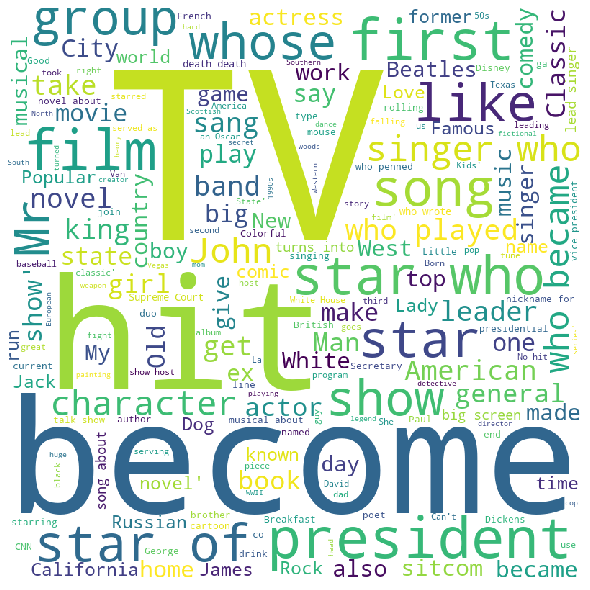

In [61]:
BEFCat =  df.loc[df['category'] == 'BEFORE & AFTER']
BEFCat['question'] = BEFCat['question'].map(delete_stopwords)

BEFWords = ' '.join(list(BEFCat["question"].values))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words("english"), 
                min_font_size = 10).generate(BEFWords)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

In [65]:
dfT = pd.concat((LITERATURECat,BEFCat))
dfT = np.random.permutation(dfT)

In [79]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dfT[:,1])
Y = df.loc[df['category'[:,3]
clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X, Y)
clf.score(X, Y)


0.861
